Upconversion es un fenómeno en el que fotones de una determinada energía excitan múltiples veces a un mismo electrón llevandolo a un estado de mayor energía que la energía individual de los fotones que incidieron.
Si este electrón luego decae al estado fundamental, emite un fotón de menor longitud de onda que los incidentes.
Hay muchos mecanismos de upconversion, pero los principales son Energy Transfer Upconversion (ETU) y Excited State Absorption (ESA). 
En este diagrama se ejemplifican los mecanismos:

![image](images/etu-esa.png "Figura 1")

Por un lado, ETU consiste en la interacción dipolo-dipolo de dos iones en el estado excitado N1, que lleva a que un tercer ión (o uno de los dos que ya estaba excitado) al estado excitado de doble energía N2, llevando a los dos iones que interactuaron nuevamente al estado fundamental.

Por otro lado, ESA consiste en la excitación de un ión en el estado N1 por un fotón con la energía necesaria para llevarlo al estado N2.

Se propone entonces estudiar este sistema bajo las siguientes hipótesis:
1. La densidad de población del estado fundamental es constante
1. Se excita al sistema con onda continua
1. La upconversion está dada por ETU o ESA.
1. Los estados excitados $N_i$ tienen tiempos de vida $\tau_i$ y decaen proporcionalmente a $A_i = \tau_i^{-1}$.

Bajo algunas aproximaciones que se pueden leer en el [pollnau](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.61.3337), la densidad de potencia incidente por el láser está dada por 

$$\rho_P = \frac{\lambda_P}{hc\pi w_P^2}P$$

Donde $\lambda_P$ es la longitud de onda de excitación, $h$ la constante de Plank, $c$ la velocidad de la luz, $w_P$ el radio de bombeo y $P$ la potencia incidente.
Entonces, las rate equations para la excitación por fotones de un estado $N_1$ a otro $N_2$ por un fotón está dada por 
$$\dot{N}_1 = - \rho_P \sigma_1 N_1$$
$$\dot{N}_2 = \rho_P \sigma_1 N_1$$
donde $\sigma_1$ es la cross section del estado $N_1$.
Lo más importante acá es que estos términos son proporcionales a la potencia incidente del láser.

Por otro lado, las ecuaciones para dos niveles que interactúan dipolarmente para generar ETU son 
$$\dot{N}_1 = - 2 W_1 N_1^2$$
$$\dot{N}_2 = W_1 N_1^2$$
donde $W_1$ es la constante del rate de ETU. En este caso, se pierden dos iones en el estado $N_1$ para ganar uno en el $N_2$ el ión restante vuelve al estado $N_0$, pero por ahora estamos asumiendo que $\dot{N}_0 = 0$ por lo que esa ecuación no nos interesa.

Entonces, para el sistema de 3 niveles con ETU y ESA las ecuaciones quedan 

![image](images/eqdif-3niv.jpeg)

Las ecuación estacionaria para $N_1$ queda

![image](images/estacionario_k1mgw1.jpeg)

Nos interesa estudiar el caso estacionario bajo algunas aproximaciones.
De esta ecuación hay que notar que el primer término es proporcional a $P^0$ y el segundo a $P^{-1}$.

##### $k_1 >> W_1 N_1$

Bajo esta aproximación se va el segundo término y queda $N_1 \propto P^0$ para potencias altas y $N_1 \propto P$ para potencias bajas.
Ahora, qué pasa con $N_2$ en cada caso?
$P>>1  \implies N_2 \propto P$, y $P<<1 \implies N_2 \propto P^2$.
Esto quiere decir que en un gráfico loglog de intensidad vs potencia, la pendiente de $N_2$ sería 1 para potencias altas y 2 para bajas.
Para verificarlo hago una simulación del sistema con las ecuaciones que escribí antes.



In [1]:
%reload_ext autoreload
%autoreload 2

In [9]:
from poincare import Simulator
from nb_tesis.nb_tesis_1 import Pollnau, pulsed_excitation, Example, duty_cycle_signal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


sim = Simulator(Pollnau, transform={"N1":Pollnau.N1, "N2":Pollnau.N2})
kwargs = {
    "values":{
        Pollnau.N0:1,
        Pollnau.N1:0,
        Pollnau.N2:0,
        Pollnau.excitation:1,
        Pollnau.sigma0:1e0,
        Pollnau.sigma1:5e-1,
        Pollnau.k1:2e0,
        Pollnau.k2:2e0,
        Pollnau.W1:2e0
    },
    "save_at":np.linspace(0, 5, 10000)
}
times =kwargs["save_at"] 
excitation = duty_cycle_signal(times, 0.01, 1, duty_cycle=1,
            time_before=0.1, before_off=True) * 1e2
result = pulsed_excitation(sim, kwargs["save_at"], excitation, kwargs["values"])

/tmp/ipykernel_321769/1021135286.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


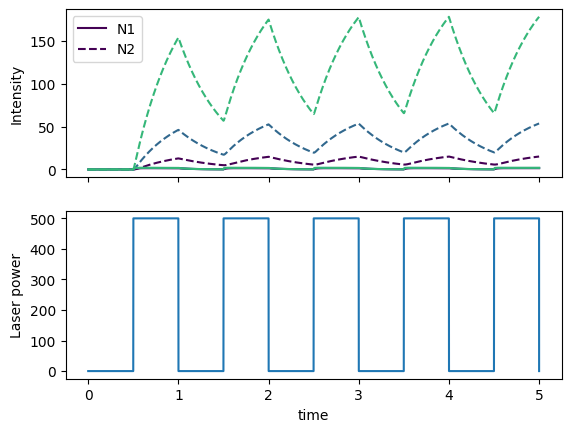

In [14]:
signal = duty_cycle_signal(times, 1, 10, duty_cycle=0.5,
            time_before=0.5, before_off=True)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
cmap = cm.get_cmap('viridis')
pots = np.geomspace(5e1, 5e2, 3)
for i, pot in enumerate(pots):
    result = pulsed_excitation(sim, times, signal*pot, kwargs["values"])
    color = cmap(i / len(pots))
    ax1.plot(times, result["N1"], color=color)
    ax1.plot(times, result["N2"], color=color, linestyle="dashed")

ax2.plot(times, result["excitation"])
ax2.set_xlabel("time")
ax2.set_ylabel("Laser power")
ax1.set_ylabel("Intensity")
ax1.legend(["N1", "N2"])
#ax1.set_yscale('log')
plt.show()

[4.99374059e-04 5.07486175e-04 5.15729899e-04 5.24107361e-04
 5.32620726e-04 5.41272192e-04 5.50063993e-04 5.58998399e-04
 5.68077717e-04 5.77304290e-04 5.86680500e-04 5.96208767e-04
 6.05891548e-04 6.15731343e-04 6.25730688e-04 6.35892164e-04
 6.46218390e-04 6.56712030e-04 6.67375787e-04 6.78212404e-04
 6.89224677e-04 7.00415446e-04 7.11787594e-04 7.23344051e-04
 7.35087792e-04 7.47021843e-04 7.59149275e-04 7.71473209e-04
 7.83996818e-04 7.96723324e-04 8.09656000e-04 8.22797565e-04
 8.36152590e-04 8.49723927e-04 8.63515064e-04 8.77529544e-04
 8.91770970e-04 9.06242999e-04 9.20949350e-04 9.35893797e-04
 9.51080179e-04 9.66512392e-04 9.82194397e-04 9.98130218e-04
 1.01432394e-03 1.03077972e-03 1.04750177e-03 1.06449438e-03
 1.08176191e-03 1.09930878e-03 1.11713947e-03 1.13525857e-03
 1.15367069e-03 1.17238057e-03 1.19139298e-03 1.21071278e-03
 1.23034492e-03 1.25029442e-03 1.27056636e-03 1.29116594e-03
 1.31209841e-03 1.33336847e-03 1.35498279e-03 1.37694629e-03
 1.39926457e-03 1.421943

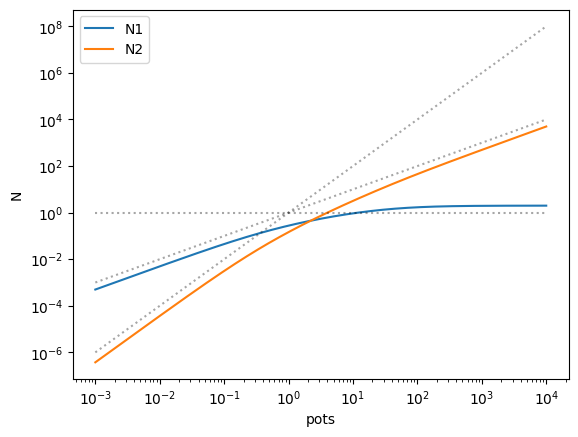

In [75]:
pots = np.geomspace(1e-3, 1e4, num=1000)
n1, n2 = p_vs_i(pots, sim, **kwargs)
plt.loglog(pots, n1, label="N1")
plt.loglog(pots, n2, label="N2")
[plt.loglog(pots, pots**n, alpha=0.35, color="k", linestyle="dotted",
            ) for n in (0, 1,2)]
plt.xlabel("pots")
plt.ylabel("N")
plt.legend()
plt.show()

Punteadas con gris estan las rectas con pendiente 0, 1 y 2.

veamos que pasa con los tiempos de vida en este caso, para las distintas potencias

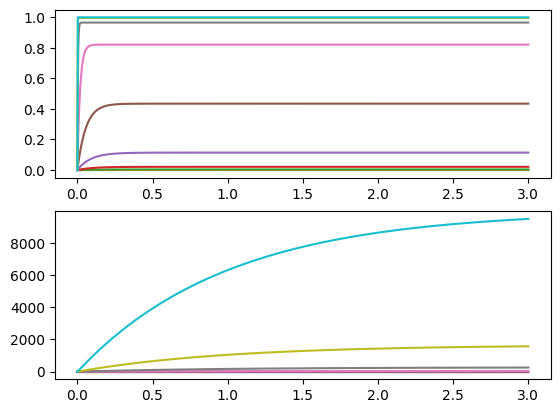

In [27]:
fig, (ax1, ax2) = plt.subplots(2)
pots = np.geomspace(1e-3, 1e4, num=10)
times = kwargs["save_at"]
for pot in pots:
    kwargs["values"][Pollnau.P] = pot
    res = sim.solve(**kwargs)
    ax1.plot(times, res["N1"])
    ax2.plot(times, res["N2"])
#ax1.set_yscale("log")
#ax2.set_yscale("log")
plt.show()


Ahora si el efecto dominante es el de ETU,

#### $k_1 << W_1 N_1$ 

Para $P>>1 \implies N_1 \propto P^0 \implies N_2 \propto P$. Para $P <<1 \implies N_1 \propto P \implies N_2 \propto P^2$

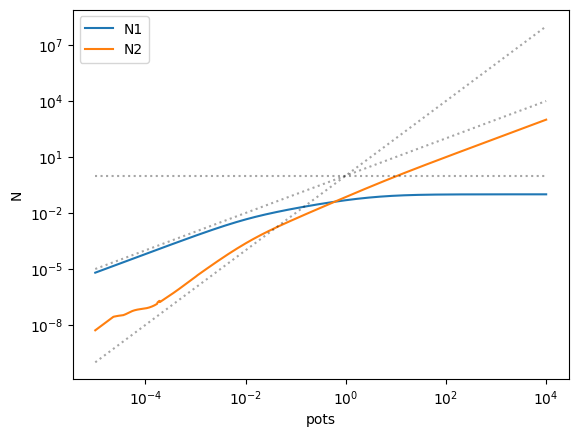

In [7]:
kwargs = {
    "model_params":{
        Pollnau.N0:1,
        Pollnau.N1:0,
        Pollnau.N2:0,
        Pollnau.P:1,
        Pollnau.sigma0:1e-1,
        Pollnau.sigma1:1e0,
        Pollnau.k1:1e-1,
        Pollnau.k2:1e0,
        Pollnau.W1:1e1
    },
    "save_at":np.linspace(0, 10, 100)
}


pots = np.geomspace(1e-5, 1e4, num=1000)
n1, n2 = p_vs_i(pots, sim, **kwargs)
plt.loglog(pots, n1, label="N1")
plt.loglog(pots, n2, label="N2")
[plt.loglog(pots, pots**n, alpha=0.35, color="k", linestyle="dotted",
            ) for n in (0, 1,2)]
plt.xlabel("pots")
plt.ylabel("N")
plt.legend()
plt.show()

Para potencias intermedias las pendientes son una combinación de las anteriores.

Acá lo importante es destacar que para potencias altas domina la upconversion, mientras que para potencias bajas domina el decaimiento natural de los electrones al estado fundamental.
Además, en general un proceso de $n$ fotones se condice con una pendiente de la curva intensidad vs potencia de ~$n$.